In [1]:
#--------------VISCOUS FLUID---------- SPHERICAL PARTICLE--------VARIABLE TIME---------
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
fig = plt.figure() 

In [2]:
x_arr = np.loadtxt('age 20.txt')                                       #all elements are in micron
y_arr = np.loadtxt('age 21.txt')                                       #all elements are in micron
t_arr = np.loadtxt('age 22.txt') 

In [3]:
len(x_arr) 

18688

In [4]:
# -------------------------Mean square displacent function and Time lag----------------------- 
import statistics as stat
from numba import jit
# ---------mean square displacement function---------- 
@jit
def msd_1d(x):
    result = np.zeros_like(x)
    for delta in range(1,len(x)):
        thisresult = 0
        for i in range(delta,len(x)):
            thisresult += (x[i] - x[i-delta])**2
        result[delta] = thisresult / (len(x) - delta)
    return result
    

In [5]:
msd_x_arr = msd_1d(x_arr)

KeyboardInterrupt: 

In [6]:
len(msd_x_arr)

100000

In [7]:
t_step = np.arange(0,10**3, 0.01) # creating intervals 

In [8]:
len(t_step)

100000

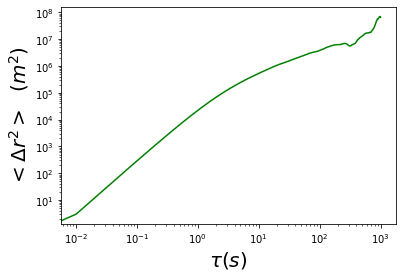

In [9]:
plt.plot(t_step,msd_x_arr,'g-')

plt.ylabel(r'$<\Delta r^2> \ \  (m^2)$',size=20)
plt.xlabel(r'$\tau  (s)$',size=20)

plt.xscale('log')
plt.yscale('log')
#plt.savefig('viscous_long.png')
#plt.axis('square')

plt.show()

In [14]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(np.log10(t_step), np.log10(msd_x_arr))

/Users/manishkumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/manishkumar/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [15]:
slope

nan